In [1]:
import numpy as np
import pandas as pd
import os, time

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA as PCAs
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.features import PCA as PCAy
import matplotlib as mpl
import numpy as np
import math
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import Birch
from sklearn import metrics
import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_csv('datasets/wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.skew()

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

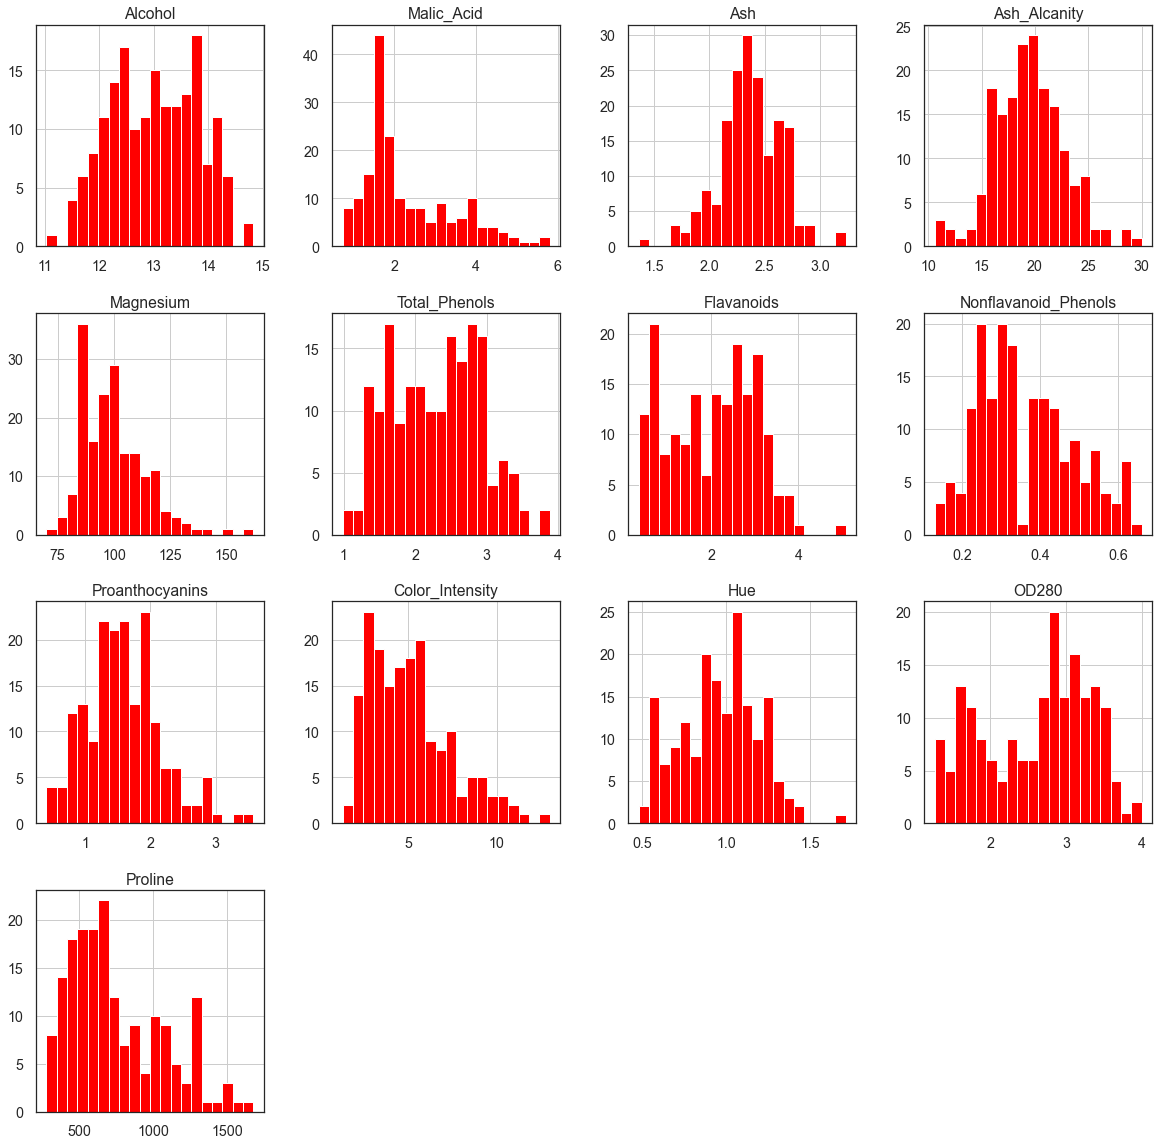

In [4]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=df.hist(bins=20,color='red' )

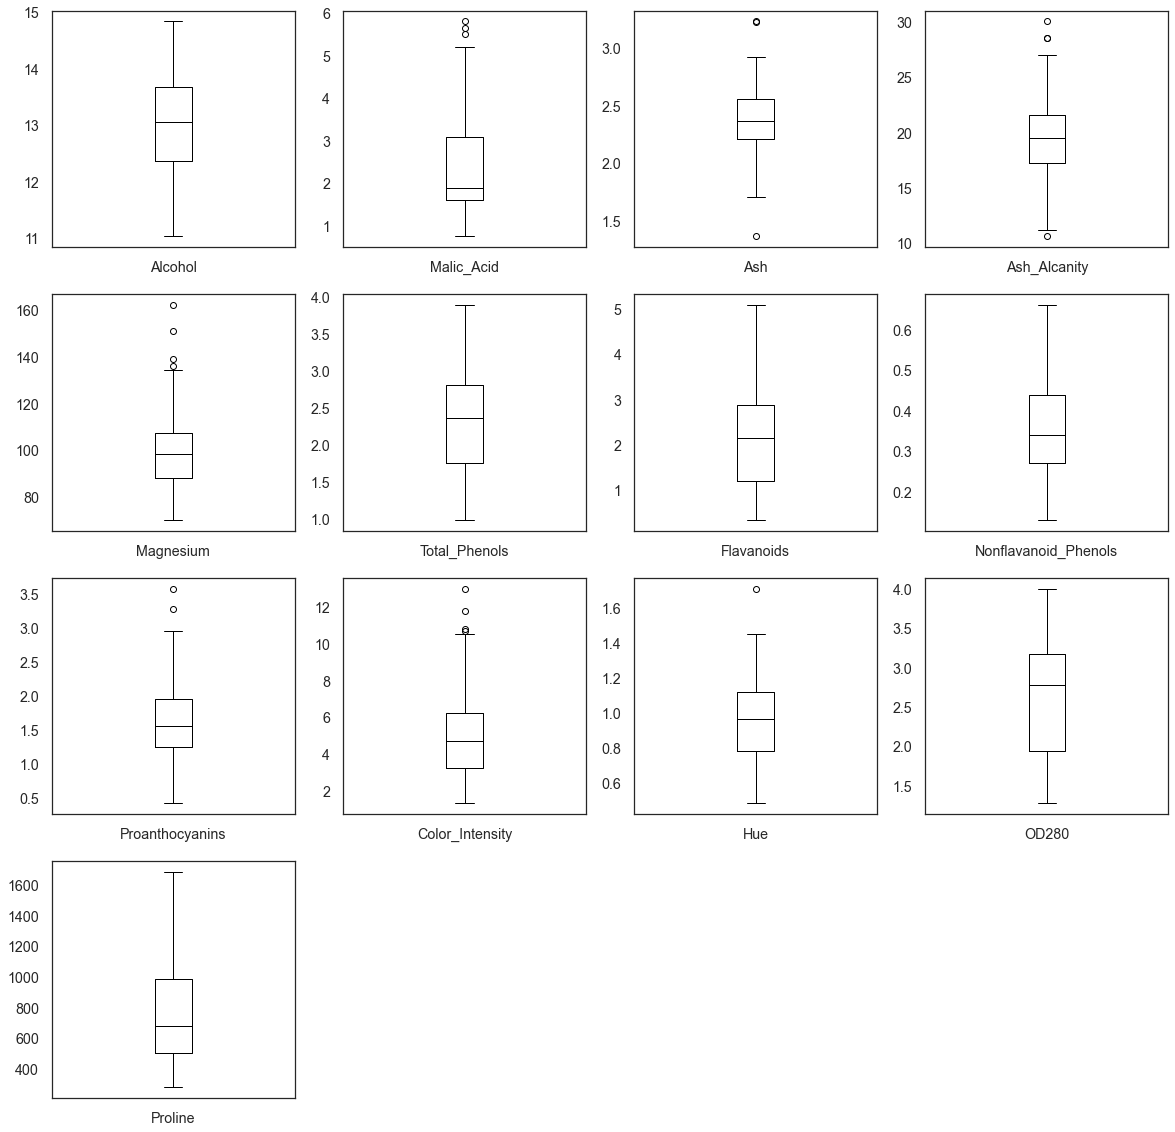

In [5]:
df.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black');

In [6]:
ss = StandardScaler()

ss.fit(df)

StandardScaler()

In [7]:
df_pp = pd.DataFrame(ss.transform(df), columns=df.columns)
df_pp.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [16]:
random_state=42
np.random.seed(42)
metrics = dict(clusters=[], silhouette=[], n_clusters=[], min_samples=[])
param_grid = dict(threshold=np.arange(0, 1.1, 0.1),
                  branching_factor=np.arange(2, 52, 2),
                  n_clusters=np.arange(2, 22, 2),
                  compute_labels=[True])

max_silhouette = 0
for g in ParameterGrid(param_grid):
    pipe = Pipeline(steps=[
        ('pca', PCAs(n_components=0.9, random_state=random_state)),
        ('clustering', Birch(**g))
    ])    

    clusters = pipe.fit_predict(df_pp)
    n_clusters = len(set(clusters))
    n_clusters = n_clusters - 1 if np.isin(clusters, -1).sum() else n_clusters
    if n_clusters < 2:
        continue
    silhouette = silhouette_score(df_pp, clusters, metric='euclidean', sample_size=20)


    metrics['silhouette'].append(silhouette)
    metrics['clusters'].append(clusters)
    metrics['n_clusters'].append(n_clusters)

    if silhouette > max_silhouette:
        max_silhouette = silhouette
        print(g)
    print(f'clusters :{n_clusters} - silhouette:{silhouette:.3f}')

{'branching_factor': 2, 'compute_labels': True, 'n_clusters': 2, 'threshold': 0.0}
clusters :2 - silhouette:0.241
{'branching_factor': 2, 'compute_labels': True, 'n_clusters': 2, 'threshold': 0.1}
clusters :2 - silhouette:0.333
clusters :2 - silhouette:0.307
clusters :2 - silhouette:0.279
clusters :2 - silhouette:0.210
clusters :2 - silhouette:0.198
{'branching_factor': 2, 'compute_labels': True, 'n_clusters': 2, 'threshold': 0.6000000000000001}
clusters :2 - silhouette:0.336
clusters :2 - silhouette:0.230
clusters :2 - silhouette:0.281
clusters :2 - silhouette:0.203
clusters :2 - silhouette:0.244
clusters :4 - silhouette:0.283
clusters :4 - silhouette:0.250
clusters :4 - silhouette:0.276
clusters :4 - silhouette:0.243
clusters :4 - silhouette:0.283
clusters :4 - silhouette:0.164
clusters :4 - silhouette:0.292
clusters :4 - silhouette:0.151
clusters :4 - silhouette:0.210
clusters :4 - silhouette:0.244
clusters :4 - silhouette:0.225
clusters :6 - silhouette:0.281
clusters :6 - silhouett

clusters :6 - silhouette:0.239
clusters :6 - silhouette:0.182
clusters :6 - silhouette:0.286
clusters :8 - silhouette:0.313
clusters :8 - silhouette:0.140
clusters :8 - silhouette:0.247
clusters :8 - silhouette:0.279
clusters :8 - silhouette:0.282
clusters :8 - silhouette:0.278
clusters :8 - silhouette:0.159
clusters :8 - silhouette:0.178
clusters :8 - silhouette:0.166
clusters :8 - silhouette:0.210
clusters :8 - silhouette:0.260
clusters :10 - silhouette:-0.032
clusters :10 - silhouette:0.093
clusters :10 - silhouette:0.154
clusters :10 - silhouette:0.018
clusters :10 - silhouette:0.064
clusters :10 - silhouette:0.122
clusters :10 - silhouette:0.088
clusters :10 - silhouette:0.120
clusters :10 - silhouette:0.001
clusters :10 - silhouette:-0.021
clusters :10 - silhouette:-0.015
clusters :12 - silhouette:0.069
clusters :12 - silhouette:0.162
clusters :12 - silhouette:0.106
clusters :12 - silhouette:0.050
clusters :12 - silhouette:0.020
clusters :12 - silhouette:0.057
clusters :12 - silh

clusters :14 - silhouette:0.078
clusters :16 - silhouette:0.064
clusters :16 - silhouette:0.155
clusters :16 - silhouette:0.115
clusters :16 - silhouette:0.021
clusters :16 - silhouette:-0.048
clusters :16 - silhouette:0.058
clusters :16 - silhouette:0.056
clusters :16 - silhouette:0.140
clusters :16 - silhouette:0.204
clusters :16 - silhouette:0.178
clusters :16 - silhouette:0.059
clusters :18 - silhouette:0.205
clusters :18 - silhouette:0.154
clusters :18 - silhouette:0.082
clusters :18 - silhouette:0.061
clusters :18 - silhouette:0.029
clusters :18 - silhouette:0.053
clusters :18 - silhouette:0.137
clusters :18 - silhouette:0.202
clusters :18 - silhouette:0.069
clusters :18 - silhouette:0.119
clusters :18 - silhouette:0.087
clusters :20 - silhouette:0.131
clusters :20 - silhouette:0.098
clusters :20 - silhouette:0.173
clusters :20 - silhouette:0.098
clusters :20 - silhouette:0.095
clusters :20 - silhouette:0.024
clusters :20 - silhouette:0.077
clusters :20 - silhouette:0.070
cluster

clusters :2 - silhouette:0.330
clusters :2 - silhouette:0.258
clusters :2 - silhouette:0.258
clusters :4 - silhouette:0.271
clusters :4 - silhouette:0.298
clusters :4 - silhouette:0.282
clusters :4 - silhouette:0.277
clusters :4 - silhouette:0.298
clusters :4 - silhouette:0.174
clusters :4 - silhouette:0.294
clusters :4 - silhouette:0.202
clusters :4 - silhouette:0.200
clusters :4 - silhouette:0.146
clusters :4 - silhouette:0.164
clusters :6 - silhouette:0.175
clusters :6 - silhouette:0.221
clusters :6 - silhouette:0.249
clusters :6 - silhouette:0.148
clusters :6 - silhouette:0.223
clusters :6 - silhouette:0.196
clusters :6 - silhouette:0.260
clusters :6 - silhouette:0.228
clusters :6 - silhouette:0.263
clusters :6 - silhouette:0.179
clusters :6 - silhouette:0.290
clusters :8 - silhouette:0.176
clusters :8 - silhouette:0.176
clusters :8 - silhouette:0.221
clusters :8 - silhouette:0.095
clusters :8 - silhouette:0.130
clusters :8 - silhouette:0.298
clusters :8 - silhouette:0.019
clusters

clusters :10 - silhouette:0.057
clusters :12 - silhouette:0.072
clusters :12 - silhouette:0.258
clusters :12 - silhouette:0.053
clusters :12 - silhouette:0.162
clusters :12 - silhouette:0.100
clusters :12 - silhouette:0.189
clusters :12 - silhouette:0.078
clusters :12 - silhouette:0.206
clusters :12 - silhouette:0.087
clusters :12 - silhouette:0.070
clusters :12 - silhouette:0.086
clusters :14 - silhouette:-0.006
clusters :14 - silhouette:0.042
clusters :14 - silhouette:0.112
clusters :14 - silhouette:0.090
clusters :14 - silhouette:0.097
clusters :14 - silhouette:0.168
clusters :14 - silhouette:0.102
clusters :14 - silhouette:0.082
clusters :14 - silhouette:0.049
clusters :14 - silhouette:0.110
clusters :14 - silhouette:0.045
clusters :16 - silhouette:0.024
clusters :16 - silhouette:0.043
clusters :16 - silhouette:0.148
clusters :16 - silhouette:-0.006
clusters :16 - silhouette:0.060
clusters :16 - silhouette:0.017
clusters :16 - silhouette:0.079
clusters :16 - silhouette:0.174
cluste

clusters :18 - silhouette:0.045
clusters :18 - silhouette:0.111
clusters :18 - silhouette:0.037
clusters :18 - silhouette:0.089
clusters :18 - silhouette:0.090
clusters :18 - silhouette:0.124
clusters :18 - silhouette:0.105
clusters :20 - silhouette:0.075
clusters :20 - silhouette:0.072
clusters :20 - silhouette:0.007
clusters :20 - silhouette:0.025
clusters :20 - silhouette:0.094
clusters :20 - silhouette:0.072
clusters :20 - silhouette:0.091
clusters :20 - silhouette:0.133
clusters :20 - silhouette:0.110
clusters :20 - silhouette:0.030
clusters :20 - silhouette:0.178
clusters :2 - silhouette:0.257
clusters :2 - silhouette:0.280
clusters :2 - silhouette:0.218
clusters :2 - silhouette:0.162
clusters :2 - silhouette:0.227
clusters :2 - silhouette:0.263
clusters :2 - silhouette:0.277
clusters :2 - silhouette:0.286
clusters :2 - silhouette:0.344
clusters :2 - silhouette:0.213
clusters :2 - silhouette:0.193
clusters :4 - silhouette:0.263
clusters :4 - silhouette:0.167
clusters :4 - silhoue

clusters :6 - silhouette:0.204
clusters :6 - silhouette:0.251
clusters :8 - silhouette:0.130
clusters :8 - silhouette:0.058
clusters :8 - silhouette:0.063
clusters :8 - silhouette:0.128
clusters :8 - silhouette:0.086
clusters :8 - silhouette:0.080
clusters :8 - silhouette:0.122
clusters :8 - silhouette:0.107
clusters :8 - silhouette:0.164
clusters :8 - silhouette:0.176
clusters :8 - silhouette:0.212
clusters :10 - silhouette:0.154
clusters :10 - silhouette:0.090
clusters :10 - silhouette:0.100
clusters :10 - silhouette:0.097
clusters :10 - silhouette:0.052
clusters :10 - silhouette:0.074
clusters :10 - silhouette:0.117
clusters :10 - silhouette:0.140
clusters :10 - silhouette:0.154
clusters :10 - silhouette:0.179
clusters :10 - silhouette:0.185
clusters :12 - silhouette:0.060
clusters :12 - silhouette:0.094
clusters :12 - silhouette:0.028
clusters :12 - silhouette:0.059
clusters :12 - silhouette:0.056
clusters :12 - silhouette:0.014
clusters :12 - silhouette:0.123
clusters :12 - silhou

clusters :14 - silhouette:-0.005
clusters :14 - silhouette:0.168
clusters :14 - silhouette:0.072
clusters :14 - silhouette:0.028
clusters :16 - silhouette:0.074
clusters :16 - silhouette:0.130
clusters :16 - silhouette:0.015
clusters :16 - silhouette:0.067
clusters :16 - silhouette:-0.053
clusters :16 - silhouette:0.146
clusters :16 - silhouette:0.055
clusters :16 - silhouette:0.126
clusters :16 - silhouette:0.112
clusters :16 - silhouette:0.147
clusters :16 - silhouette:0.003
clusters :18 - silhouette:0.159
clusters :18 - silhouette:0.098
clusters :18 - silhouette:0.005
clusters :18 - silhouette:0.166
clusters :18 - silhouette:0.058
clusters :18 - silhouette:0.123
clusters :18 - silhouette:0.064
clusters :18 - silhouette:0.150
clusters :18 - silhouette:0.033
clusters :18 - silhouette:0.061
clusters :18 - silhouette:0.093
clusters :20 - silhouette:0.046
clusters :20 - silhouette:0.047
clusters :20 - silhouette:0.116
clusters :20 - silhouette:0.036
clusters :20 - silhouette:0.084
cluste

clusters :2 - silhouette:0.305
clusters :2 - silhouette:0.153
clusters :2 - silhouette:0.278
clusters :2 - silhouette:0.147
clusters :2 - silhouette:0.225
clusters :2 - silhouette:0.215
clusters :2 - silhouette:0.283
clusters :4 - silhouette:0.294
clusters :4 - silhouette:0.329
clusters :4 - silhouette:0.257
clusters :4 - silhouette:0.374
clusters :4 - silhouette:0.329
clusters :4 - silhouette:0.218
clusters :4 - silhouette:0.218
clusters :4 - silhouette:0.369
clusters :4 - silhouette:0.169
clusters :4 - silhouette:0.210
clusters :4 - silhouette:0.266
clusters :6 - silhouette:0.178
clusters :6 - silhouette:0.101
clusters :6 - silhouette:0.272
clusters :6 - silhouette:0.194
clusters :6 - silhouette:0.249
clusters :6 - silhouette:0.257
clusters :6 - silhouette:0.130
clusters :6 - silhouette:0.143
clusters :6 - silhouette:0.288
clusters :6 - silhouette:0.284
clusters :6 - silhouette:0.233
clusters :8 - silhouette:0.116
clusters :8 - silhouette:0.208
clusters :8 - silhouette:0.198
clusters

clusters :10 - silhouette:0.238
clusters :10 - silhouette:0.059
clusters :10 - silhouette:0.062
clusters :10 - silhouette:0.202
clusters :10 - silhouette:0.332
clusters :10 - silhouette:0.114
clusters :12 - silhouette:0.123
clusters :12 - silhouette:0.063
clusters :12 - silhouette:-0.026
clusters :12 - silhouette:0.194
clusters :12 - silhouette:0.070
clusters :12 - silhouette:0.085
clusters :12 - silhouette:0.100
clusters :12 - silhouette:0.081
clusters :12 - silhouette:0.027
clusters :12 - silhouette:0.156
clusters :12 - silhouette:0.212
clusters :14 - silhouette:0.038
clusters :14 - silhouette:0.006
clusters :14 - silhouette:0.134
clusters :14 - silhouette:0.118
clusters :14 - silhouette:0.052
clusters :14 - silhouette:0.040
clusters :14 - silhouette:0.025
clusters :14 - silhouette:0.073
clusters :14 - silhouette:-0.019
clusters :14 - silhouette:0.031
clusters :14 - silhouette:0.030
clusters :16 - silhouette:0.123
clusters :16 - silhouette:0.063
clusters :16 - silhouette:0.102
cluste

clusters :18 - silhouette:0.119
clusters :18 - silhouette:0.108
clusters :18 - silhouette:0.168
clusters :18 - silhouette:0.151
clusters :20 - silhouette:0.057
clusters :20 - silhouette:0.077
clusters :20 - silhouette:0.025
clusters :20 - silhouette:0.067
clusters :20 - silhouette:0.091
clusters :20 - silhouette:0.035
clusters :20 - silhouette:0.083
clusters :20 - silhouette:0.073
clusters :20 - silhouette:0.036
clusters :20 - silhouette:0.046
clusters :20 - silhouette:0.134
clusters :2 - silhouette:0.170
clusters :2 - silhouette:0.322
clusters :2 - silhouette:0.311
clusters :2 - silhouette:0.247
clusters :2 - silhouette:0.223
clusters :2 - silhouette:0.266
clusters :2 - silhouette:0.201
clusters :2 - silhouette:0.293
clusters :2 - silhouette:0.348
clusters :2 - silhouette:0.239
clusters :2 - silhouette:0.240
clusters :4 - silhouette:0.218
clusters :4 - silhouette:0.348
clusters :4 - silhouette:0.183
clusters :4 - silhouette:0.225
clusters :4 - silhouette:0.195
clusters :4 - silhouette

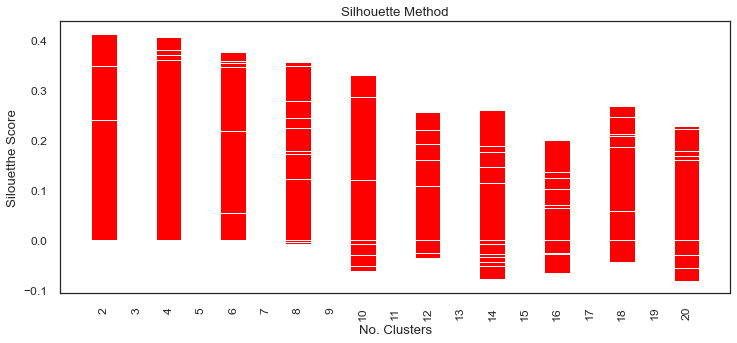

In [17]:
sns.set(style='white',font_scale=1.1, rc={'figure.figsize':(12,5)})
plt.subplots()
max_silhouette = max(metrics['silhouette'])
index = metrics['silhouette'].index(max_silhouette)
silhouette_cluster = metrics['silhouette'].index(max_silhouette) + 2

n = len(metrics['silhouette'])
plt.bar(metrics['n_clusters'], height=metrics['silhouette'], color='red')
#plt.plot(index, max_silhouette, 'o', linewidth=2, markersize=12, color='green')
#plt.plot([3, index], 2*[max_silhouette], '--', linewidth=2, markersize=12, color='green')
#plt.plot([index, index], [0, max_silhouette], '--', linewidth=2, markersize=12, color='green')
plt.xticks(range(min(metrics['n_clusters']), max(metrics['n_clusters'])+1, 1), rotation=90)
plt.title('Silhouette Method')
plt.xlabel('No. Clusters')
plt.ylabel('Silouetthe Score')
plt.show()

In [52]:
random_state=42
n_cluster=4
g={'branching_factor': 48, 'compute_labels': True, 'n_clusters': 3, 'threshold': 0.2}
pipe = Pipeline(steps=[
    ('pca', PCAs(n_components=0.9, random_state=random_state)),
    ('clustering', Birch(**g))
])   

pipe.fit(df_pp)

Pipeline(steps=[('pca', PCA(n_components=0.9, random_state=42)),
                ('clustering', Birch(branching_factor=48, threshold=0.2))])

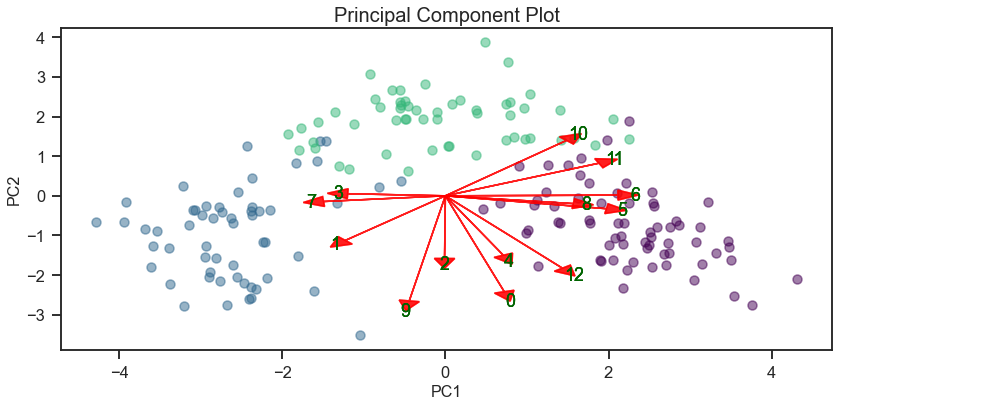

In [66]:
def biplot_list(pipe, df_scaled, segs_list=[None], scale_list=[None], cluster_list=[None], figsize=(12,6), components=(0,1)):
    sns.set_theme(style="ticks", context="talk", palette="rocket")
    
    pcx, pcy = components
    feature_names = df_scaled.columns
    segs = feature_names if segs_list==[None] else segs_list
    
    index_filter = df_scaled.columns.isin(segs)
    features_to_show = feature_names[index_filter]
    scale = len(features_to_show)*[5] if scale_list==[None] else len(features_to_show)*scale_list
    fig, ax = plt.subplots(figsize=figsize)
    
    df_pca = pipe.named_steps['pca'].transform(df_scaled)
    v = pd.DataFrame(pipe.named_steps['pca'].components_.T, index=feature_names) # features, components
    
    algo_has_attr = True if hasattr(pipe.named_steps['clustering'], 'cluster_centers_') else False
    if algo_has_attr:    
        clusters = pipe.predict(df_pp)
        centroids = pipe.named_steps['clustering'].cluster_centers_
    algo_has_attr = True if hasattr(pipe.named_steps['clustering'], 'subcluster_centers_') else False
    if algo_has_attr:
        clusters = pipe.predict(df_pp)
        centroids = pipe.named_steps['clustering'].subcluster_centers_
    else:
        clusters = pipe.fit_predict(df_pp)
    n_clusters = len(set(clusters))
    
    algo_has_attr = True if hasattr(pipe.named_steps['clustering'], 'cluster_centers_indices_') else False
    if algo_has_attr:
        clusters_centers_indices  = pipe.named_steps['clustering'].cluster_centers_indices_
    
    # plot components
    cluster_list = range(n_clusters) if cluster_list==[None] else cluster_list
    
    colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, n_clusters+1)))
    for _, clust in zip(colors, cluster_list):
        df_pca_n_cluster = df_pca[clusters==clust]
        algo_has_attr = True if hasattr(pipe.named_steps['clustering'], 'cluster_centers_') else False
        if algo_has_attr: 
            centroids_n_cluster = centroids[clust]
        algo_has_attr = True if hasattr(pipe.named_steps['clustering'], 'subcluster_centers_') else False
        if algo_has_attr: 
            centroids_n_cluster = centroids[clust] 
            
        n_clusters = clusters[clusters==clust]
        
        color = colors.by_key()['color'][clust]
        # plot components
        scatter = ax.scatter(df_pca_n_cluster[:, pcx], df_pca_n_cluster[:, pcy], color=color, alpha=0.5) # color['color']
        algo_has_attr = True if hasattr(pipe.named_steps['clustering'], 'cluster_centers_') else False
        if algo_has_attr:
            for pt in df_pca_n_cluster:
                plt.plot([centroids_n_cluster[pcx], pt[pcx]], [centroids_n_cluster[pcy], pt[pcy]], color=color) #color['color']
            
        legend = ax.legend(*scatter.legend_elements(), loc="upper right", bbox_to_anchor=(1.2, clust*0.05 + 0.02))
        ax.add_artist(legend)
        
        # mark centroids
        algo_has_attr = True if hasattr(pipe.named_steps['clustering'], 'cluster_centers_') else False
        if algo_has_attr:
            plt.scatter(centroids[clust, pcx], centroids[clust, pcy], marker="$%d$" % clust, s=100, linewidths=2, color="cyan", zorder=10)
#         algo_has_attr = True if hasattr(pipe.named_steps['clustering'], 'subcluster_centers_') else False
#         if algo_has_attr:
#             plt.scatter(centroids[:, pcx], centroids[:, pcy], marker="$%d$" % clust, s=100, linewidths=2, color="cyan", zorder=10)
        
        # plot arrow
        for n_feature, feature in enumerate(features_to_show):
            x, y = scale[n_feature]*v.loc[feature, pcx], scale[n_feature]*v.loc[feature, pcy] 
            plt.arrow(0, 0, x, y, color = 'red', alpha = 0.5, head_length=0.25, head_width=0.25)
            plt.text(x*1.1, y*1.1, n_feature, color='darkgreen', ha='center', va='center')


    
    ax.set_xlabel(f'PC{pcx+1}', fontsize=16)
    ax.set_ylabel(f'PC{pcy+1}', fontsize=16)
    ax.set_title('Principal Component Plot', fontsize=20)
    plt.tight_layout()
    plt.show()
    arrow_dict = dict(zip(range(len(features_to_show)), features_to_show))
    return fig, arrow_dict

# scale_list <= number of features
# cluster_list <= number of clusters
# segs_list <= feature names to graph



_, arrow_dict = biplot_list(pipe, df_pp, scale_list=[None], cluster_list=[None], segs_list=[None], components=(0, 1));

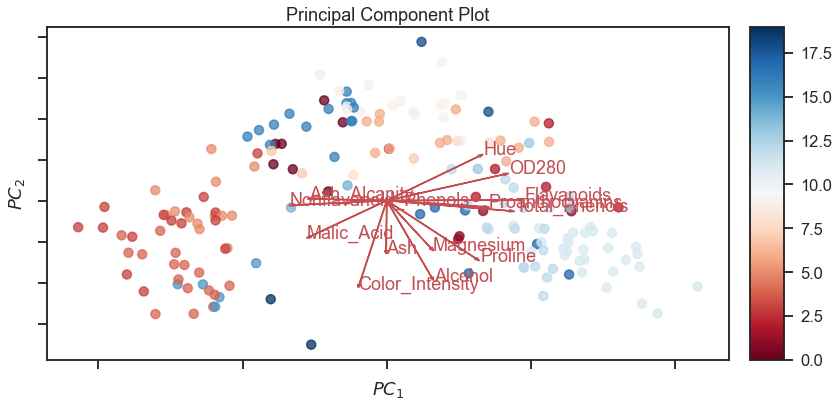

In [67]:
plt.figure(figsize=(12,6))

visualizer = PCAy(scale=True, proj_features=True)
visualizer.fit_transform(df_pp, clusters)
visualizer.show();

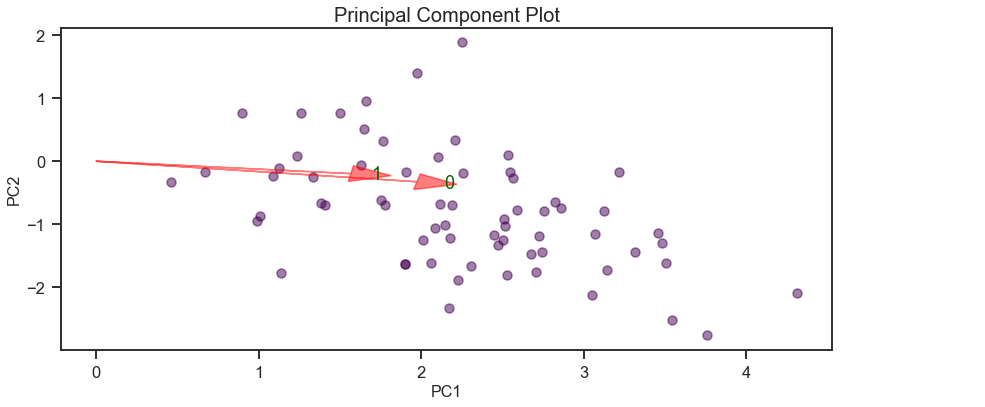

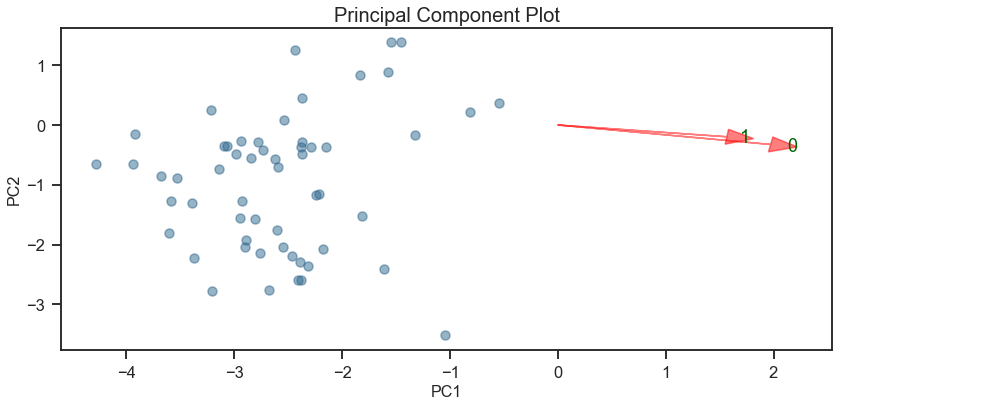

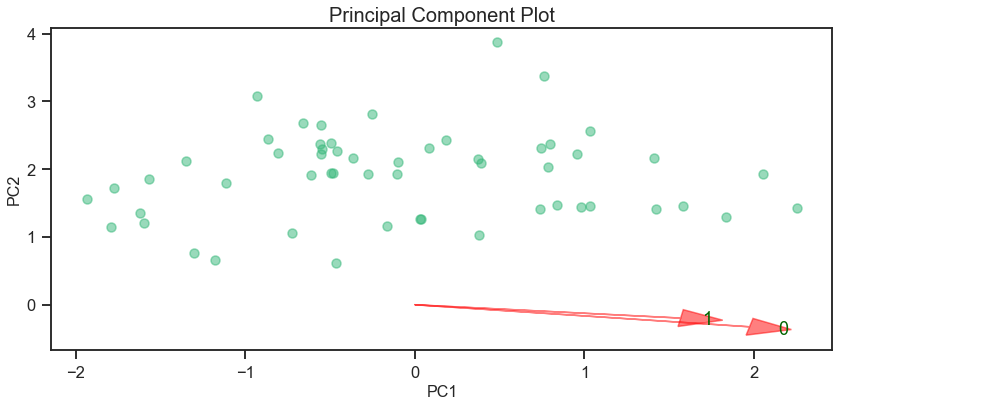

In [68]:
for i in range(len(np.unique(pipe.fit_predict(df_pp)))):
    _, arrow_dict = biplot_list(pipe, df_pp, scale_list=[5], cluster_list=[i], segs_list=['Total_Phenols', 'Proanthocyanins'], components=(0, 1));